[2024-04-26](https://thefiddler.substack.com/p/can-you-play-the-price-is-right-continuously) [Fiddler](https://thefiddler.substack.com)
========
If player A's sum is $a$, then player B spins once if the first spin is greater than $a$
and spins twice otherwise.  Here, $s$ is B's first spin.

In [1]:
%display latex
a = var('a')
s = var('s')
bwins(a) = (integral(1-a,s,0,a) + integral(1,s,a,1)).simplify_full()
bwins

a |--> -a^2 + 1

So A's strategy would be to spin once if the first spin is greater than some $x$, and spin
twice otherwise.  Here, $a_1$ is A's first spin and $a_2$ is A's second spin.

In [2]:
a_1, a_2, x = var('a_1 a_2 x')
awins(x) = integral(integral(1-bwins(a_1+a_2),a_2,0,1-a_1),a_1,0,x) + integral(1-bwins(a_1),a_1,x,1)
awins

x |--> -1/12*x^4 - 1/3*x^3 + 1/3*x + 1/3

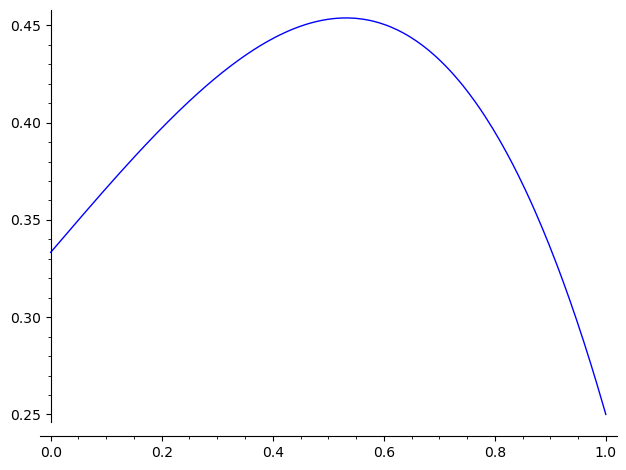

In [3]:
plot(awins,x,0,1)

This has a maximum when $x$ is somewhere between 0.4 and 0.6, so let $x_1$ be that $x$.

In [4]:
assume(x, "real")
solution = solve(diff(awins,x) == 0, x)
solution

[x == (1/2*I*sqrt(3) - 1/2)^(1/3) + 1/(1/2*I*sqrt(3) - 1/2)^(1/3) - 1]

In [5]:
x_1 = solution[0].rhs().simplify_full()
x_1

2*cos(2/9*pi) - 1

In [6]:
numerical_approx(x_1)

0.532088886237956

As expected, $x_1$ is between 0.4 and 0.6.  Now we can find the probability that A wins

In [7]:
awins(x_1).simplify_full()

-4/3*cos(2/9*pi)^4 + 2*cos(2/9*pi)^2 - 2/3*cos(2/9*pi) + 1/4

In [8]:
numerical_approx(awins(x_1))

0.453801867273976

So player A spins twice if the first spin is less than $x_1 \approx 0.5321$ and has approximately a 45.38% chance of winning.

Extra credit
------------
If player B wins, then what player C does is irrelevant, since player A loses in any case.

If player B does not win, then player C's strategy is the same as player B's strategy in the
two player case.

In [9]:
cwins = bwins
cwins

a |--> -a^2 + 1

If player B's first spin is greater than the greater of player A's sum, $a$, and $x_1$,
player B will spin once, and spin twice otherwise.

First, consider the case where player A's sum is less than $x_1$,

In [10]:
b_beats_a_lt(a) = integral(1-a,s,0,a) + integral(1-s,s,a,x_1) + integral(1,s,x_1,1)
b_beats_a_lt

a |--> -(a - 1)*a + 1/2*a^2 - 2*cos(2/9*pi)^2 - a + 2*cos(2/9*pi) + 1/2

Then, consider the case where player A's sum is greater than $x_1$,

In [11]:
b_beats_a_gt(a) = integral(1-a,s,0,a) + integral(1,s,a,1)
b_beats_a_gt

a |--> -(a - 1)*a - a + 1

which is just the same $1-a^2$.

So player A will spin once if the first spin is greater than some $x > x_1$ and twice otherwise,

In [12]:
awins3(x) = integral((1-b_beats_a_gt(a_1))*(1-cwins(a_1)),a_1,x,1) \
   + integral(integral((1-b_beats_a_gt(a_1+a_2))*(1-cwins(a_1+a_2)),a_2,0,1-a_1),
              a_1, x_1, x) \
   + integral(integral((1-b_beats_a_gt(a_1+a_2))*(1-cwins(a_1+a_2)),a_2,x_1-a_1,1-a_1) \
           + integral((1-b_beats_a_lt(a_1+a_2))*(1-cwins(a_1+a_2)),a_2,0,x_1-a_1) \
           , a_1, 0, x_1)
awins3

x |--> -1/30*x^6 + 8/3*cos(2/9*pi)^6 - 1/5*x^5 - 8*cos(2/9*pi)^5 + 10*cos(2/9*pi)^4 - 20/3*cos(2/9*pi)^3 + 5/2*cos(2/9*pi)^2 + 1/5*x - 1/2*cos(2/9*pi) + 29/120

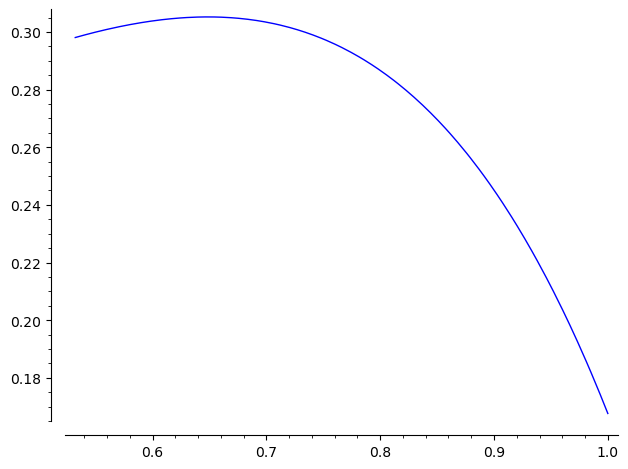

In [13]:
plot(awins3,x,x_1,1)

This has a maximum when $x = x_2$, which is somewhere between 0.6 and 0.7.

In [14]:
solution = solve(diff(awins3,x) == 0, x)
solution

[0 == x^5 + 5*x^4 - 1]

No closed form solution, so let's get a numerical answer.

In [15]:
x_2 = find_root(solution[0],x_1,1)
x_2

0.6486549525490607

In [16]:
numerical_approx(awins3(x_2))

0.305226945070757

So player A spins twice if the first spin is less than $x_2 \approx 0.6487$ and has approximately a 30.52% chance of winning.